In [2]:
import numpy as np
import matplotlib.pyplot as plt

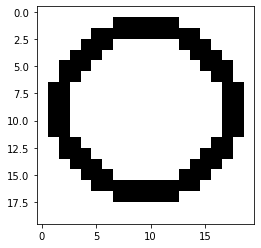

In [67]:
I1 = plt.imread('A.png')
I2 = plt.imread('B.png')
I3 = plt.imread('C.png')

# Convert rgb to binary
I1 = (np.mean(I1, axis=2) > 0.5) * 1
I2 = (np.mean(I2, axis=2) > 0.5) * 1
I3 = (np.mean(I3, axis=2) > 0.5) * 1

plt.imshow(I1, cmap='gray')
plt.show()

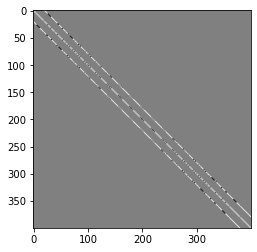

In [68]:
Width = 20
Height = 20

Jij = np.zeros((Width*Height, Width*Height))

for i in range(Width):
    for j in range(Height):

        for ii in range(-1,1):
            for jj in range(-1,1):
                if (i+ii >= 0) and (i+ii < Width) and (j+jj >= 0) and (j+jj < Height):

                    k = i*Width + j
                    l = (i+ii)*Width + (j+jj)

                    if( I1[i, j] == I1[i+ii, j+jj] ):
                        Jij[k, l] = 1
                        Jij[l, k] = 1
                    else:
                        Jij[k, l] = -1
                        Jij[l, k] = -1

for i in range(Width*Height):
    Jij[i,i] = 0

plt.imshow(Jij, cmap='gray')
plt.show()

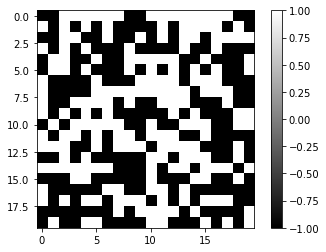

In [69]:
Input = np.random.rand(Width*Height,1) > 0.5
Input = 2 * Input - 1

plt.imshow(Input.reshape(Width,Height), cmap='gray')
plt.colorbar()
plt.show()

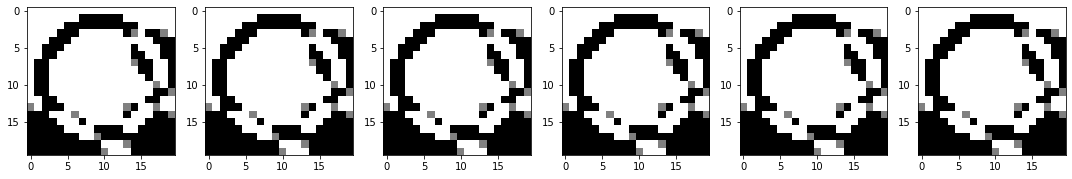

In [84]:
MaxEpoch = 5

fig, axs = plt.subplots(1, MaxEpoch+1, figsize=(15, 5))
axs[0].imshow(Input.reshape(Width,Height), cmap='gray')

for Epoch in range(MaxEpoch):
    for i in range(Width*Height):

        j = np.random.randint(Width*Height)
        Output = np.copy(Input)
        Output[j] = -1 * Output[j]

        EneryBefore = -0.5 * np.matmul(np.matmul(Input.T, Jij), Input)
        EneryAfter  = -0.5 * np.matmul(np.matmul(Output.T, Jij), Output)

        if EneryAfter < EneryBefore:
            Input = np.copy(Output)
        elif np.random.rand() < np.exp(-(EneryAfter - EneryBefore)):
            Input = np.copy(Output)

        Input[j] = np.sign(np.matmul(Jij[j,:], Input))

    axs[Epoch+1].imshow(Input.reshape(Width,Height), cmap='gray')

plt.tight_layout()
plt.show()